# 回归

![神经元数学模型](../assets/神经元数学模型.png)
神经元输入向量$x = [x_1, x_2, \cdots, x_n]^T$, 经过函数映射:$f_{\theta}:x\rightarrow y$后得到输出y, 考虑线性变化:
$$f(x) = w^Tx+b$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Starting gradient descent at b = 0, w = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, w = 1.4777440851894448, error = 112.61481011613473


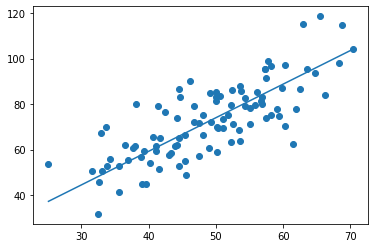

In [5]:
# %load ./linear_regression.py
import numpy as np

# data = []
# for i in range(100):
# 	x = np.random.uniform(3., 12.)
# 	# mean=0, std=0.1
# 	eps = np.random.normal(0., 0.1)
# 	y = 1.477 * x + 0.089 + eps
# 	data.append([x, y])
# data = np.array(data)
# print(data.shape, data)

# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # computer mean-squared-error
        totalError += (y - (w * x + b)) ** 2
    # average loss for each point
    return totalError / float(len(points))



def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx+b-y)
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        # grad_w = 2(wx+b-y)*x
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
    # update w'
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]


def run():
    plt.figure()
    points = np.genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w,
                  compute_error_for_line_given_points(initial_b, initial_w, points))
          )
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".
          format(num_iterations, b, w,
                 compute_error_for_line_given_points(b, w, points))
          )
    plt.scatter(points[:, 0], points[:, 1])
    min_, max_ = np.min(points[:, 0]), np.max(points[:, 0])
    plt.plot([min_, max_], [w*min_ + b, w * max_ + b])
    
    plt.show()

if __name__ == '__main__':
    run()